<a href="https://colab.research.google.com/github/MrNoby47/Deep_learning/blob/main/traffic_signs_preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [13]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import cv2
import pickle
import pandas as pd

In [15]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    valid_data = pickle.load(f)


X_train,y_train = train_data['features'],train_data['labels']
X_test,y_test = train_data['features'],train_data['labels']
X_val,y_val = train_data['features'],train_data['labels']

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 3)
(34799, 32, 32, 3)


In [16]:
assert(X_train.shape[0] == y_train.shape[0]), 'Number of Image is not equal to Number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'Number of Image is not equal to Number of labels'
assert(X_val.shape[0] == y_val.shape[0]), 'Number of Image is not equal to Number of labels'
assert(X_train.shape[1:] == (32,32,3)), 'Image size different to 32 x 32 x 3'
assert(X_test.shape[1:] == (32,32,3)), 'Image size different to 32 x 32 x 3'
assert(X_val.shape[1:] == (32,32,3)), 'Image size different to 32 x 32 x 3'

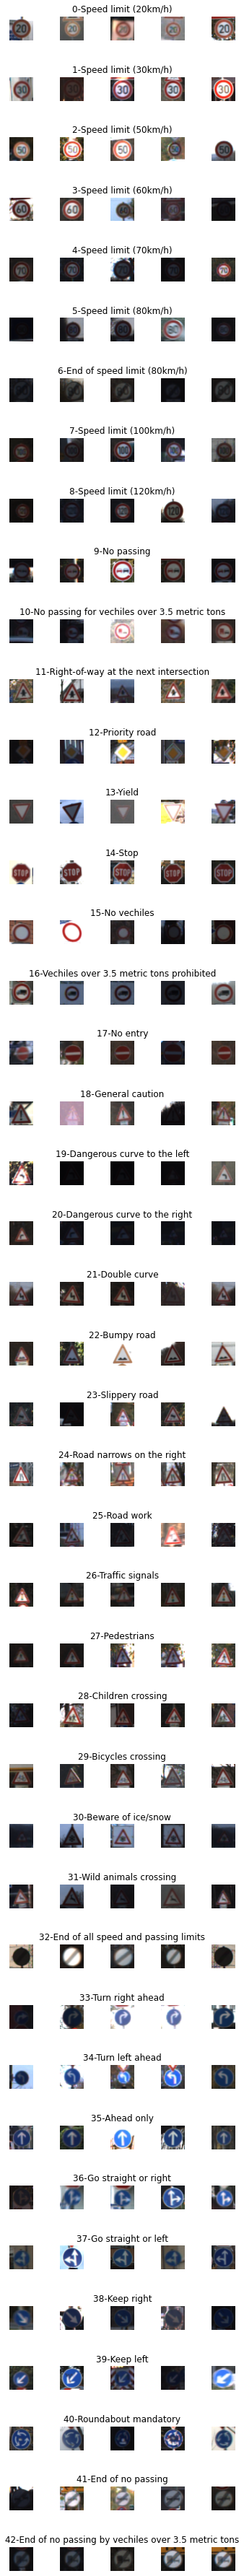

In [17]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_sample = []

num_class = 43
cols = 5
fig, axs = plt.subplots(ncols = cols, nrows= num_class, figsize = (5,50))
fig.tight_layout()

for i in range(cols):
  for j,row in data.iterrows():
      x_selected = X_train[y_train==j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) -1))], cmap= plt.get_cmap('gray'))
      axs[j][i].axis('off')
      if i == 2:
        axs[j][i].set_title(str(j) + '-' + row['SignName'])
        num_of_sample.append(len(x_selected))


Text(0, 0.5, 'Number of image')

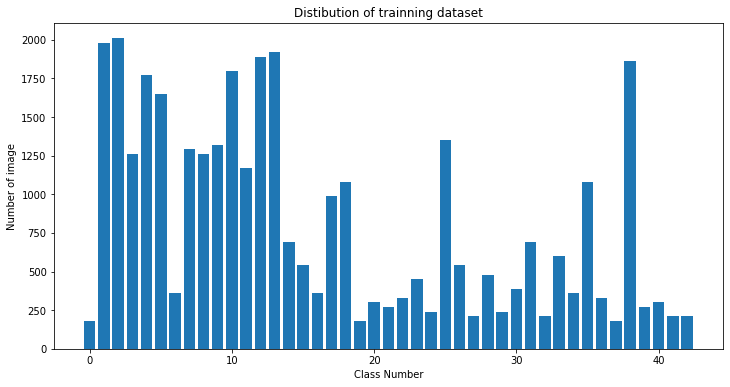

In [18]:
plt.figure(figsize=(12,6))
plt.bar(range(0,num_class), num_of_sample)
plt.title("Distibution of trainning dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of image")

In [19]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))



(-0.5, 31.5, 31.5, -0.5)

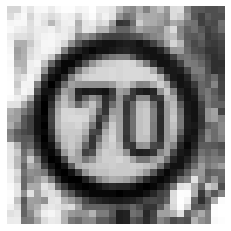

In [20]:
plt.imshow(X_train[random.randint(0, len(X_train) -1)], cmap=plt.get_cmap("gray"))
plt.axis('off')

In [21]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)
print(X_train.shape)

(34799, 32, 32, 1)
